# Analyse Order 2 order 1

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : May 30th  2022
- last update : 


### 

    


- **kernel anaconda3_auxtel** at CC or **python 3** locally

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

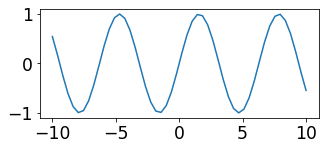

In [3]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
#pip install fpdf
#from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
string_date

'2022-05-30'

In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.8.4'

In [11]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
#from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, HGAMMA, HDELTA,HEPSILON,O2_1, H2O_1, ATMOSPHERIC_LINES
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [12]:
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [13]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

In [14]:
from time import sleep

In [15]:
from astropy.time import Time
import astropy.units as u

# Function

In [16]:
def file_tag_forsorting(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^exposure_.*([0-9][0-9][0-9][0-9][0-9])_postisrccd.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None


In [17]:
def subdir_tag_forsorting(subdir):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('.*([0-9][0-9][0-9][0-9][0-9])$', subdir)
    if len(m)>0:
        return m[0]
    else:
        return None


In [18]:
file_tag_forsorting('exposure_2022031600330_postisrccd.fits')

'00330'

In [19]:
subdir_tag_forsorting('2022031600330')

'00330'

# Config

In [20]:
# path index for each month
DATE="20211104"

# Input file

/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/BG40~holo4_003/config_DECONVOLUTION_PSF1D/20211104/2021110400508/basespec

In [21]:
top_path = "/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/BG40~holo4_003/config_DECONVOLUTION_PSF1D"

In [22]:
exposure ="2021110400508"

In [23]:
path=os.path.join(os.path.join(top_path,DATE),exposure)

In [24]:
path_subdir=os.path.join(path,"basespec")

In [25]:
all_files = os.listdir(path_subdir)

In [26]:
all_files 

['exposure_2021110400508_postisrccd_table.csv',
 'exposure_2021110400508_postisrccd_lines.csv',
 'exposure_2021110400508_postisrccd_spectrogram.fits',
 'exposure_2021110400508_postisrccd_spectrum.fits']

In [27]:
table = pd.read_csv(os.path.join(path_subdir,all_files[0]))

In [28]:
table

,lambdas,Dx,Dy,Dy_disp_axis,flux_sum,flux_integral,flux_err,fwhm,Dy_fwhm_sup,Dy_fwhm_inf,amplitude,x_c,y_c,gamma,alpha,saturation
0,315.288388,890.323512,-4.562149,-4.350976,16.350582,1.931161,11.107721,28.756957,9.816158,-18.940455,1.931161,0.892981,190.101856,37.925972,5.161018,8500.0
1,315.642431,891.323500,-4.544182,-4.355863,13.983736,2.271968,11.119939,28.744942,9.828117,-18.916481,2.271968,1.892969,190.119822,37.886898,5.155020,8500.0
2,315.996469,892.323488,-4.526229,-4.360750,21.179093,2.709624,11.135353,28.735759,9.841479,-18.893937,2.709624,2.892957,190.137776,37.847853,5.149026,8500.0
3,316.350502,893.323476,-4.508288,-4.365637,22.837524,2.808833,11.139885,28.723795,9.853438,-18.870014,2.808833,3.892945,190.155717,37.808838,5.143038,8500.0
4,316.704530,894.323465,-4.490360,-4.370524,-6.497992,-5.688692,11.073894,28.711311,9.865124,-18.845844,-5.688692,4.892933,190.173644,37.769853,5.137053,8500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,1031.399208,2945.298974,5.327811,-14.393561,3093.781103,2470.141687,15.850718,23.060644,16.857995,-6.202373,2470.141687,2055.868442,199.991816,20.506855,2.523264,8500.0
2056,1031.740383,2946.298962,5.319457,-14.398448,3103.201348,2496.255876,15.862754,23.067578,16.853108,-6.214194,2496.255876,2056.868431,199.983462,20.529007,2.526699,8500.0
2057,1032.081550,2947.298950,5.311090,-14.403334,3077.638870,2470.943990,15.811005,23.074537,16.848221,-6.226040,2470.943990,2057.868419,199.975095,20.551188,2.530139,8500.0
2058,1032.422707,2948.298938,5.302711,-14.408221,3076.340762,2466.608233,15.787519,23.081522,16.843334,-6.237912,2466.608233,2058.868407,199.966716,20.573399,2.533584,8500.0


In [29]:
spectrum = Spectrum(file_name=os.path.join(path_subdir,all_files[-1]))

set date_obs to 2021-11-05T04:49:33.916
set expo to 20.0
set airmass to 1.41214447333932
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to -0.28
set dec to -66.0397222222222
set hour_angle to -45.38165160354449
set temperature to 5.6
set pressure to 740.35
set humidity to 37.0
set lambda_ref to 578.253619221546
set parallactic_angle to -60.35656136093252


/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      ...  Z_VALUE  SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...                           
----------- ------------- ------------- ... --------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635 ... 0.0000590                1


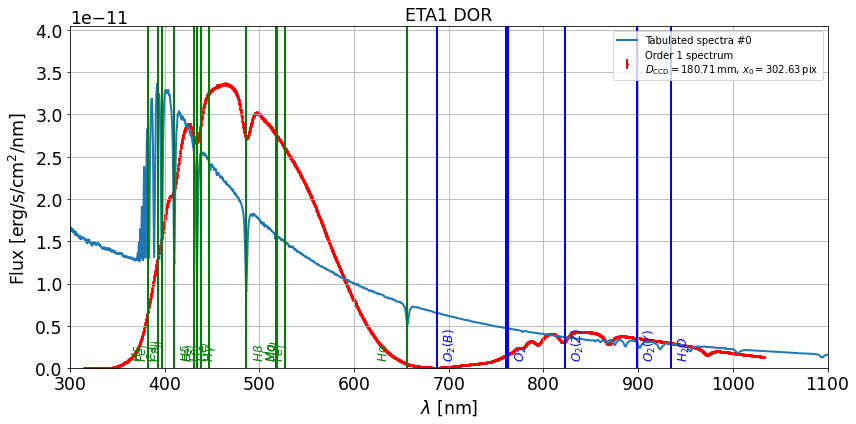

In [30]:
spectrum.plot_spectrum(xlim=[300,1100], live_fit=False, force_lines=True)

In [31]:
spectrum.lambdas

array([ 315.28838763,  315.64243083,  315.99646897, ..., 1032.08154976,
       1032.42270739, 1032.76385606])

In [32]:
spectrum.data

array([3.34249903e-15, 3.92799264e-15, 4.67947146e-15, ...,
       1.35582963e-12, 1.35303890e-12, 1.34936635e-12])

# Work with table

In [33]:
WLCUT = 670

Text(0, 0.5, 'ADU')

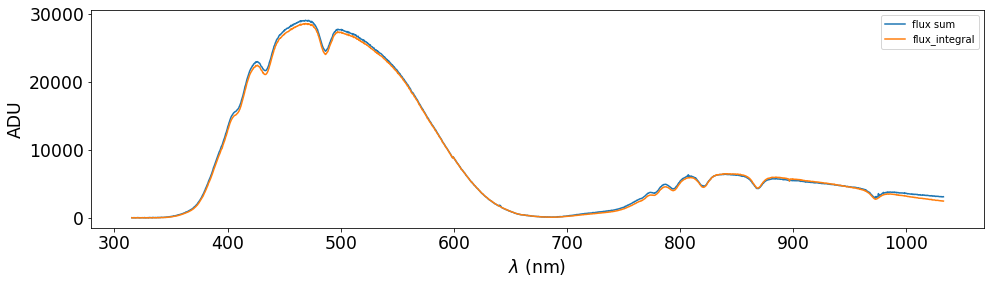

In [34]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(table.lambdas,table.flux_sum,label="flux sum")
ax.plot(table.lambdas,table.flux_integral,label="flux_integral")
ax.legend()
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("ADU")

In [35]:
order1_idx_t = np.where(table.lambdas.values<WLCUT)
order2_idx_t = np.where(table.lambdas.values>WLCUT)

In [36]:
wl1_t = table.lambdas.values[order1_idx_t] 
flux1_t= table.flux_sum.values[order1_idx_t] 

In [37]:
wl2_t = table.lambdas.values[order2_idx_t]/2. 
flux2_t= table.flux_sum.values[order2_idx_t]*2. 

Text(0, 0.5, 'ADU')

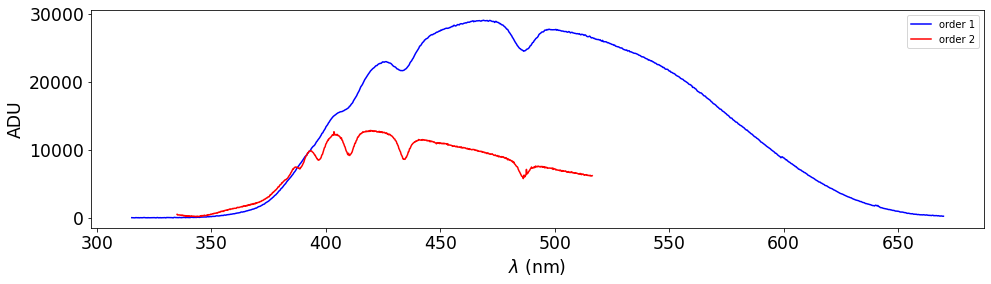

In [38]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(wl1_t,flux1_t,"b",label="order 1")
ax.plot(wl2_t,flux2_t,"r",label="order 2")
ax.legend()
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("ADU")

In [39]:
WL=np.arange(350.,520.)

In [40]:
f1_t=np.interp(WL,wl1_t,flux1_t)
f2_t=np.interp(WL,wl2_t,flux2_t)

Text(0, 0.5, 'order2/order1')

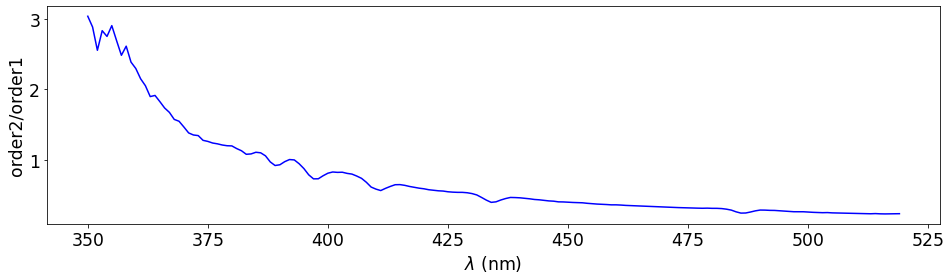

In [41]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(WL,f2_t/f1_t,'b')
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("order2/order1")

## Work with Spectrum

In [42]:
order1_idx_s = np.where(spectrum.lambdas<WLCUT)
order2_idx_s = np.where(spectrum.lambdas>WLCUT)

In [44]:
wl1_s = spectrum.lambdas[order1_idx_s] 
flux1_s= spectrum.data[order1_idx_s] 

In [45]:
wl2_s = spectrum.lambdas[order2_idx_s]/2. 
flux2_s= spectrum.data[order2_idx_s]*2. 

Text(0, 0.5, 'Flux unit')

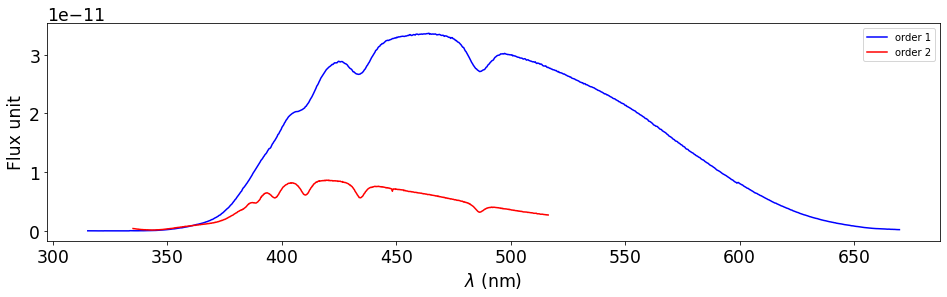

In [46]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(wl1_s,flux1_s,"b",label="order 1")
ax.plot(wl2_s,flux2_s,"r",label="order 2")
ax.legend()
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("Flux unit")

In [47]:
f1_s=np.interp(WL,wl1_s,flux1_s)
f2_s=np.interp(WL,wl2_s,flux2_s)

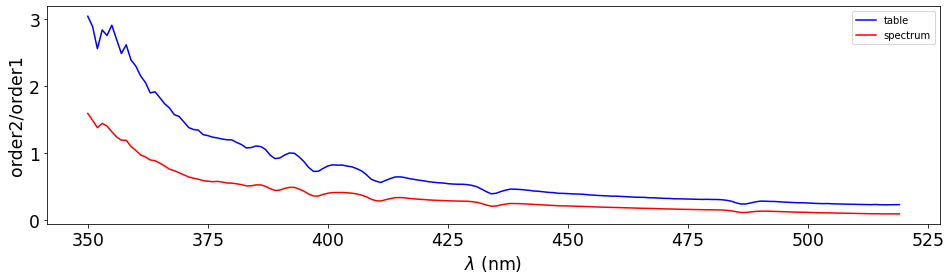

In [53]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(WL,f2_t/f1_t,'b',label="table")
ax.plot(WL,f2_s/f1_s,'r',label="spectrum")
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("order2/order1")
ax.legend()